## A Predictive and Inferential Analysis of the OJ Dataset
The motivation of this is analysis is two fold:
- develop a model that predicts whether a purchase is MM OJ based on a set of features
- observing which features are most important for the purchase of MM OJ and thus, what should product managers focus on to increase sales

In [1]:
#Loading Library for analyses 
#loading neccessary packages 
library(boot)
library(caret)
library(tidyverse)
library(ISLR2)
library(glmnet)
library(tidyverse)
library(ISLR2)
library(caret)
library(e1071)
library(neuralnet)
library(dplyr)
library(ggplot2)
library(Hmisc)
library(corrplot)
library(DescTools)
library(kernlab)
library(xgboost)

#setting graphics for figures
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(18,10)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:boot’:

    melanoma


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-6


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute



Attaching package: ‘Hmisc’


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:dplyr’:



### Data Exploration
Taking a dive into our data, the first thing I'm interested in is:
- are there any missing values in my data ?
- does my data have an inherent class imabalance ?
- which features are highly correlated ?

In [2]:
#loading and view OJ data set
set.seed(0)
OJ

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


No NA's found so this is a pretty nice data set. I hope I get this lucky in practice.

In [7]:
#checking for na's
sum(is.na(OJ))

[1] 0


       CH        MM 
0.6102804 0.3897196 

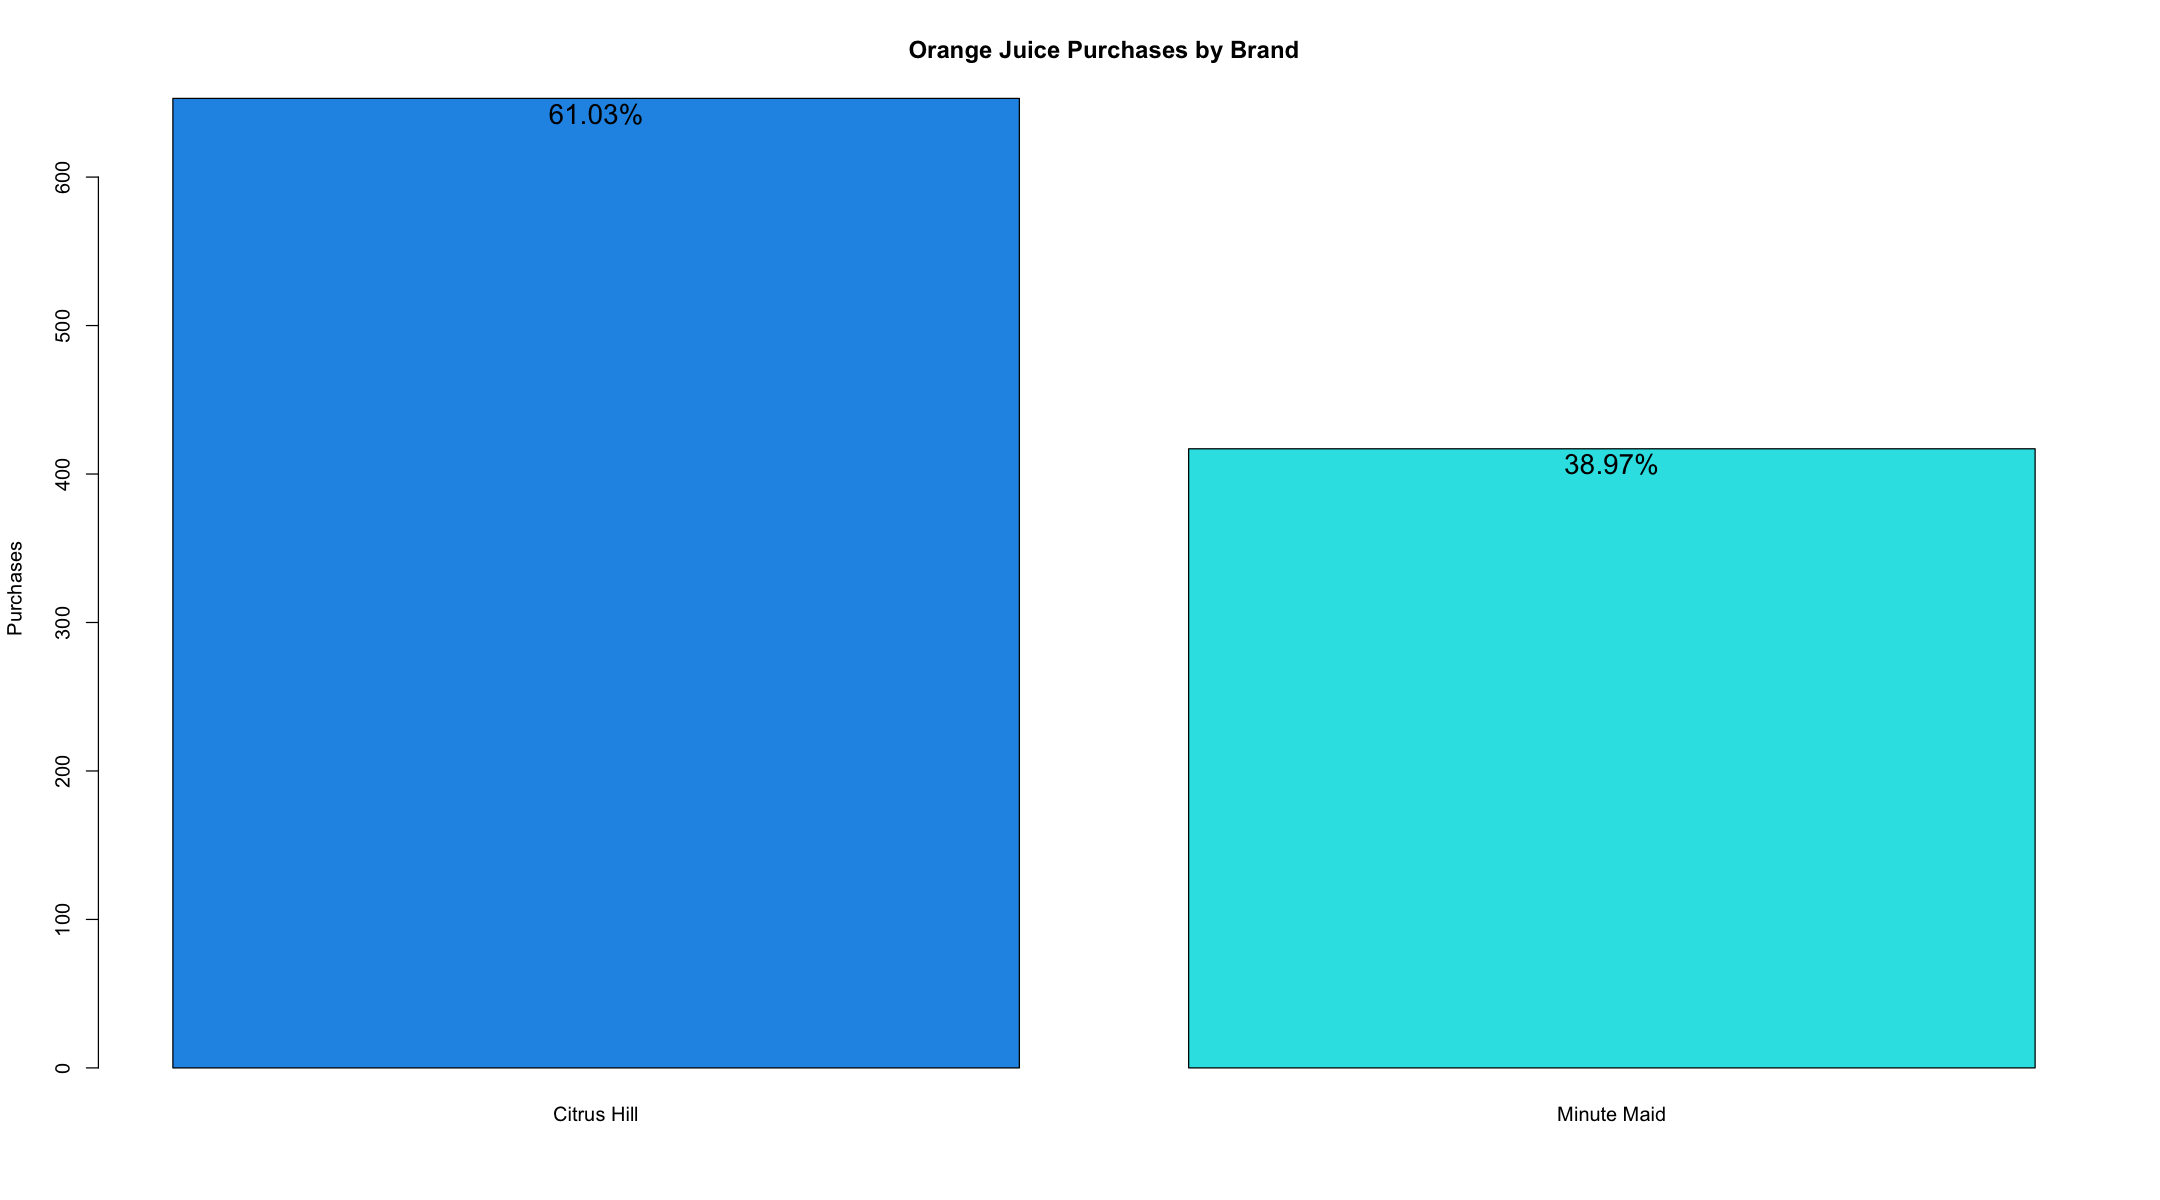

In [21]:
#examining distribution of target variable
bar <- barplot(table(OJ$Purchase), #creates tabular data for Purchases
        names.arg = c("Citrus Hill", "Minute Maid"), #naming bars
        col = 4:5, #assigning color to each bar
        ylab = "Purchases",
        main = "Orange Juice Purchases by Brand", #title of plot
        )

table(OJ$Purchase)/sum(table(OJ$Purchase)) #getting fraction of purchases

text(x=bar, #since by default, barplot gets midpoint of each bar, so using this sets the text placement
     y = table(OJ$Purchase)-10, # sets vertical height of text. i adjusted it downards
     labels=c("61.03%","38.97%"), #sets lables
     cex = 1.4 #sets font size
    )

I think it's cool to visualize the different distributions inside your data set. Some modelling methods may not be as robust to features with non-normal distributions such as LDA. However, the models I will be using for this don't make any assumptions about the distribution of the features used so everything will be fine ... I hope. 

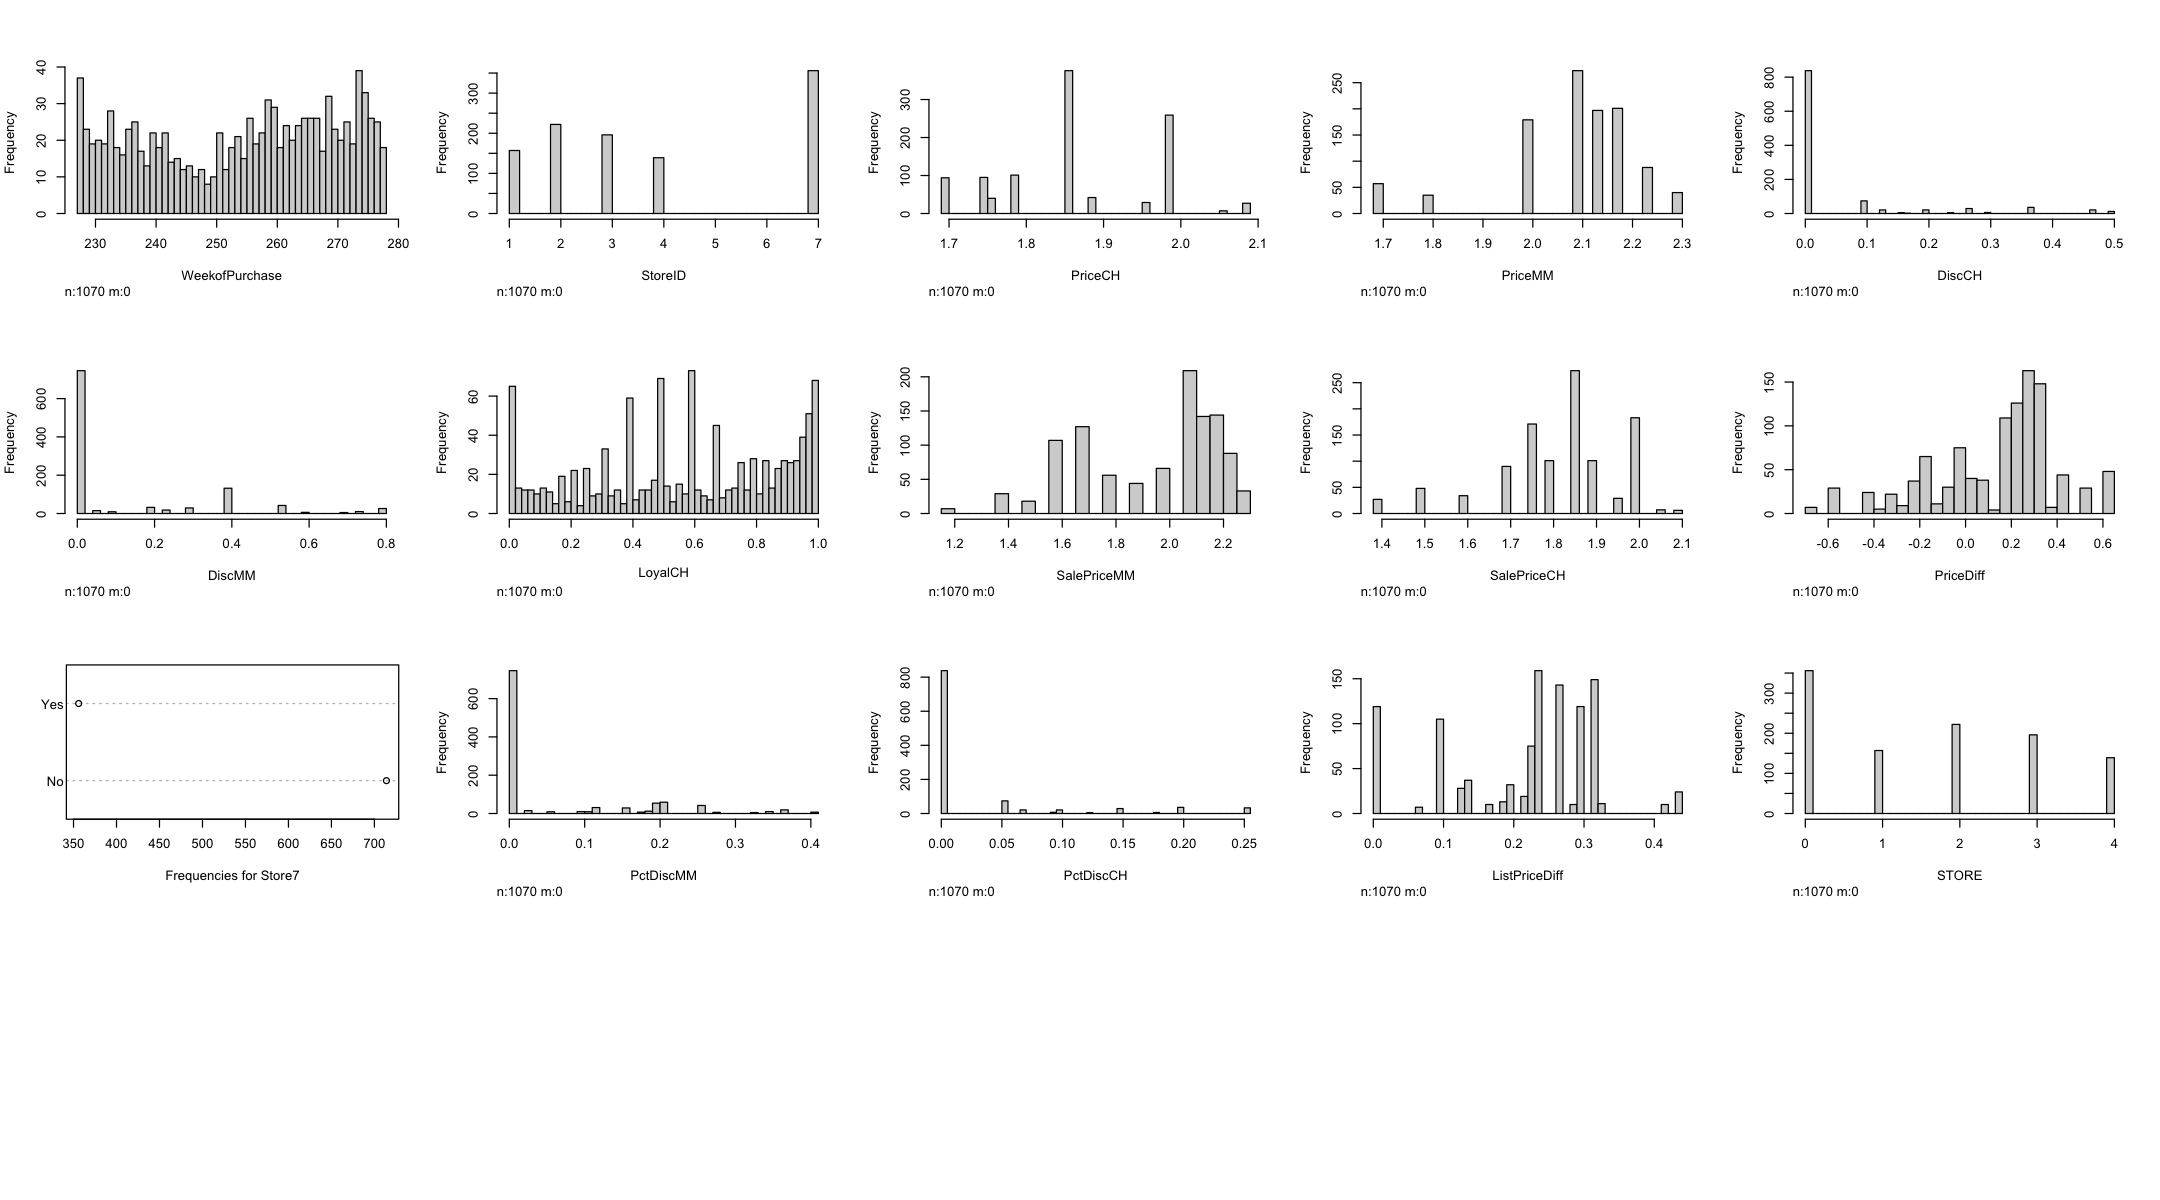

In [22]:
#looking at distribution of features
hist.data.frame(OJ[-1])

There doesn't appear to be any obvious trend when plotting the purchases by week of purchase so I will opt out of any time series analysis. [confirm with Dr Becker]

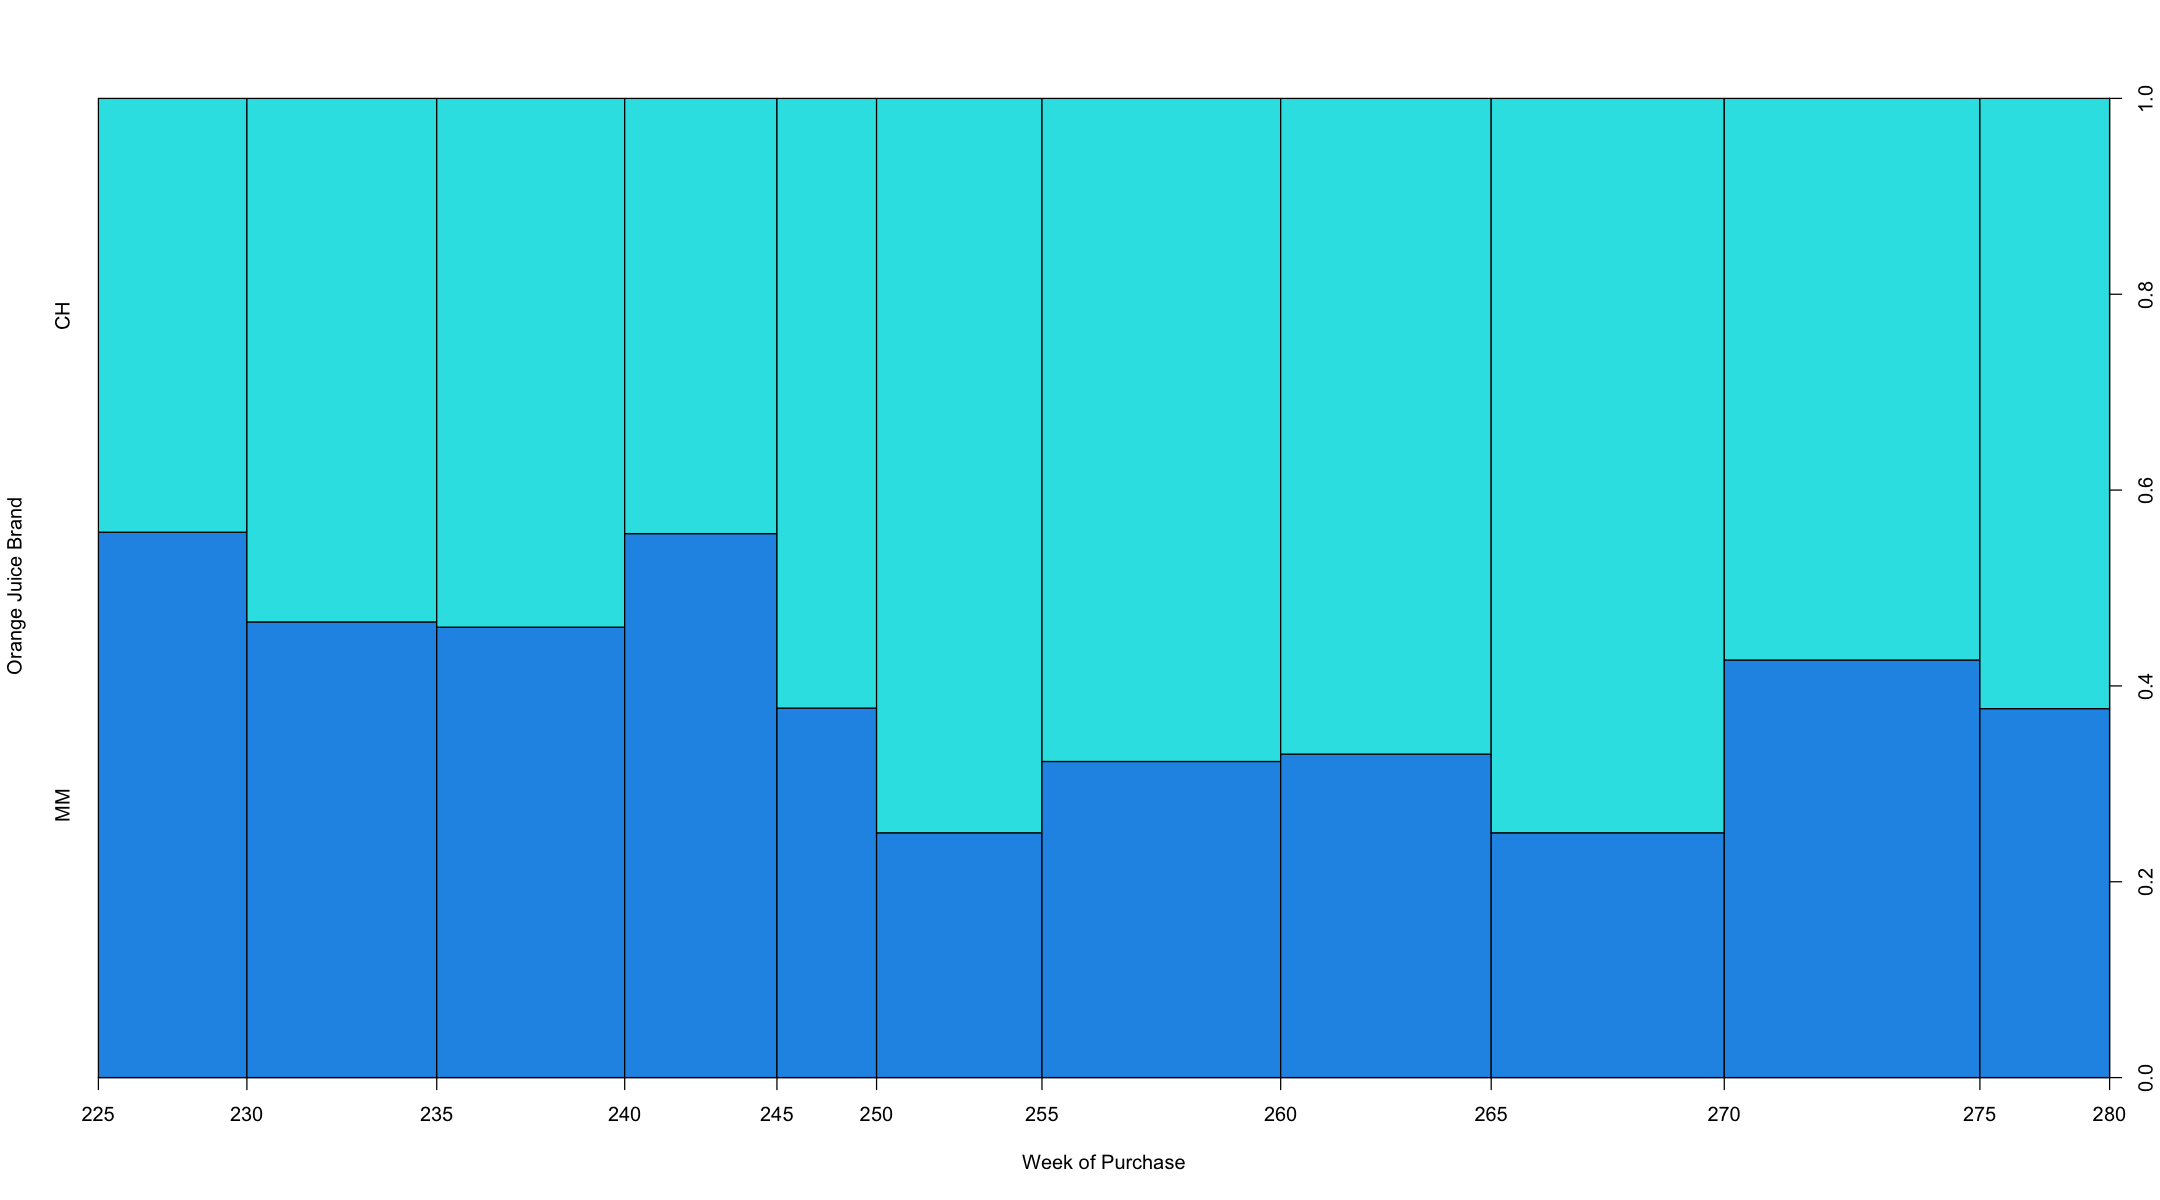

In [37]:
plot(OJ$Purchase ~ OJ$WeekofPurchase,
     col = 4:5, ylab = " Orange Juice Brand",
     xlab = "Week of Purchase")

Just from inspecting the features and some basic financial math, I immediately recognize that the all the price features are going to be highly correlated. This is because, for example, PriceCH is used to create SpecialCH, SalesPriceCH, etc. This is confirmed by the following correlelogram. I also reorder the correlelogram so that these strong correlations can be view easily. As suspected, all the features that are derived from the price of each orange are signficantly correlated. 

Via consumer pricing theory, it has been shown that a significant factor that influences the purchase of a good or service is the perceived discount. Thus, how fruitful would it be for a product/sales manager to include price differences versus including the percentage discount ? I will explore this question during the prescriptive analysis as which ones should be focused on are the key component of that analysis.

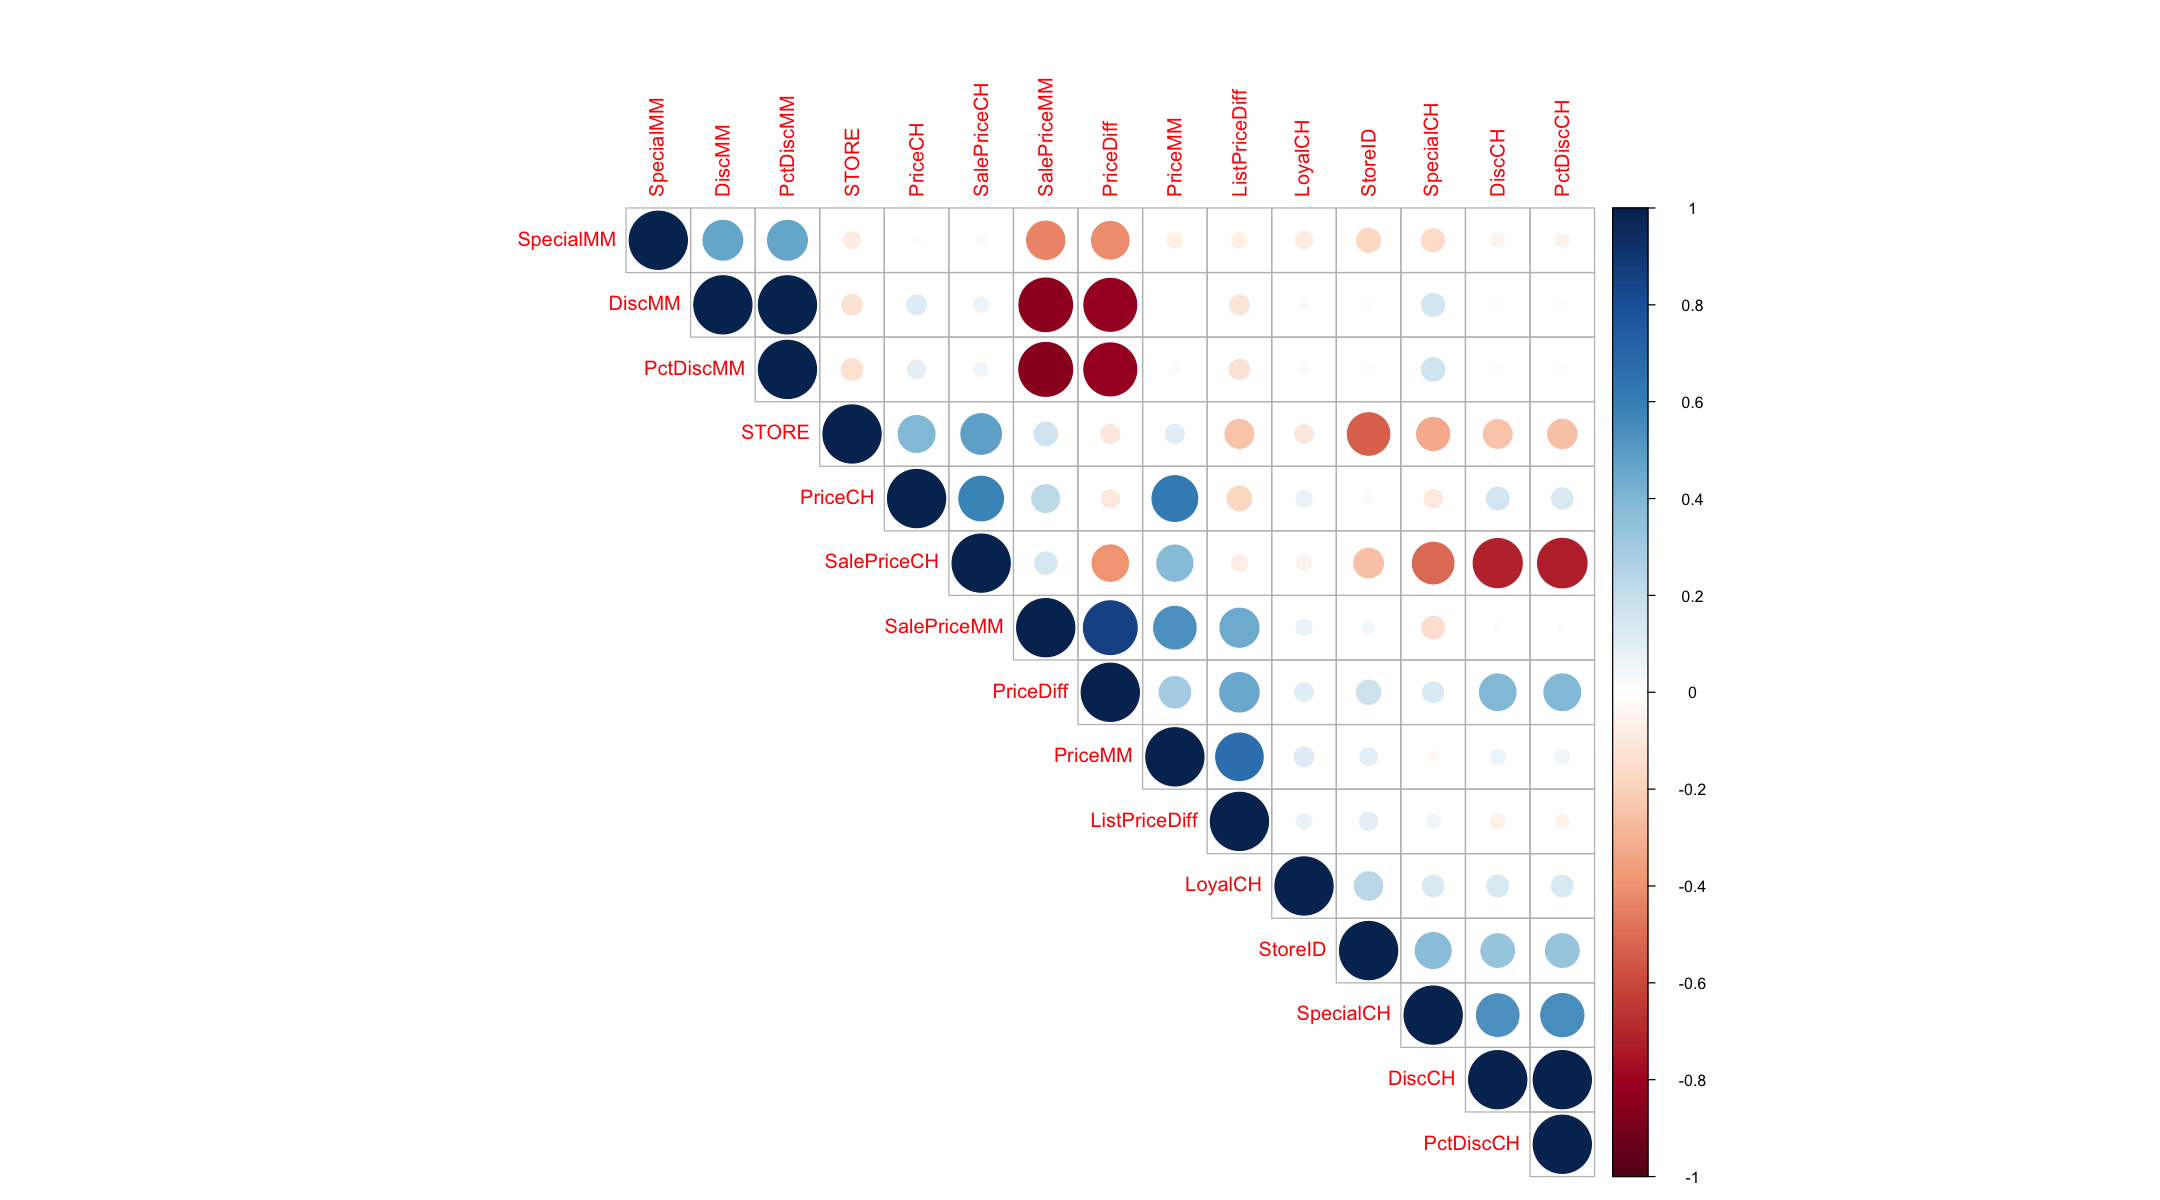

In [34]:
#looking at correlation between variables
temp <- cor(subset(OJ, select = -c(Purchase, Store7, WeekofPurchase))) #removing unneccessary variables.
corrplot(temp, type="upper", order="hclust")

### Predictive Analysis
For this part, I will be using 3 of my go to models:
- GLM (ole faithful) - super explainable and is a statistical modelling standard
- XGBoost (big kid on the blocks) - honestly, it feels like cheating sometimes using this weak learner ensemble because it's extremely robust and consistently outperfoms most models out of the box. Even moreso, it offers some insight into variable importance, which other high performing, non-parametric supervised methods do not.
- VDNN (very deep neural net) - VDNN is an acronym I made up because it adds a distinct coolness to the model. I'm using this because I genuinely enjoy black-boxing things. It is also a good benchmark: how much effort do I have to put into this NN to get it perform as well as the first two models ? 

Firstly, I will remove the highly correlated variables as well as irrelevant ones such as StoreID,STORE,Store7, WeekofPurchase. These choices are founded on my assumption that the most significant indicator for making a purchase is the percentage discount. 

In [66]:
#creating data set used for predictions.
OJ.Pred <- subset(OJ, select =-c(StoreID, STORE, WeekofPurchase,
                                 SalePriceCH, SpecialCH, DiscCH,
                                 SalePriceMM, SpecialMM, DiscMM,
                                 PriceDiff,Store7 ,ListPriceDiff))

Below, I use the sample function instead of samplefrac because I've found that in some instances with the latter, the training and validation set do not sum to the original data set

In [67]:
#setting seed for consistent results
set.seed(0)

#splitting data into training and validation set
sample <- sample(c(TRUE, FALSE), nrow(OJ.Pred), replace=TRUE, prob=c(0.9,0.1))

train.set <- OJ.Pred[sample, ]

val.set <- OJ.Pred[!sample, ]

#### GLM Model
We that from our regression, we obtained a relatively decent cross validation metric. It is important to understand that a good performance on a training set does not imply a good performance on the validation set. What the cross validation gives you is a sense of how robust your approach is. This is good to keep in mind to avoid any potential bias when modelling.

In [69]:
fit.glm <- train(Purchase ~ .,
                data = train.set,
                method = "glm",
                family = "binomial",
                trControl = trainControl(method = "repeatedcv", number = 10, repeats = 3)
                # preProcess = c("center","scale")
                )
fit.glm

Generalized Linear Model 

951 samples
  5 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 857, 856, 856, 855, 856, 856, ... 
Resampling results:

  Accuracy   Kappa    
  0.8223428  0.6198664


In [71]:
temp <- glm(Purchase ~ ., data =train.set,family = binomial)

summary(temp)


Call:
glm(formula = Purchase ~ ., family = binomial, data = train.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7305  -0.5730  -0.2579   0.5479   2.7882  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.1371     1.6238   1.316 0.188126    
PriceCH       3.9091     1.1783   3.318 0.000908 ***
PriceMM      -3.2637     0.8303  -3.931 8.46e-05 ***
LoyalCH      -6.2640     0.4072 -15.382  < 2e-16 ***
PctDiscMM     4.9362     0.9032   5.465 4.62e-08 ***
PctDiscCH    -7.6561     1.7456  -4.386 1.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1265.58  on 950  degrees of freedom
Residual deviance:  754.48  on 945  degrees of freedom
AIC: 766.48

Number of Fisher Scoring iterations: 5


#### XGBoost
Here, I'm setting all parameters to their default values except for the amount of trees to test. I also employ parallel processing to decrease the run time, albeit, the data set is relatively small. I originally ran the boost for 100,500,1000,1500 trees, but there was no significant improvement after 500 trees, I reduced the grid search to 100 and 500 trees.

In [76]:
# Define grid of hyperparameters
xgboost.grid <- expand.grid(
  nrounds = c(100, 500),
  max_depth = 6,
  eta = c(0.1,0.2,0.3), #learning rate
  gamma = 0.1,
  colsample_bytree = 1,
  min_child_weight = 1,
  subsample = 1
)

# Define cross-validation scheme
ctrl <- trainControl(
  method = "repeatedcv",
  number = 10, #number of folds in validation 
  repeats = 3, #number of times to repeat validation 
  verboseIter = FALSE,
  allowParallel = TRUE
  # numberParallel = 4
)

# Train the model using cross-validation
xgb_model <- train(
  Purchase ~ .,
  data = train.set,
  method = "xgbTree", #sets xgboost as method for cross validation 
  trControl = ctrl,
  tuneGrid = xgboost.grid,
  nthread = 5 #number of processes to spread work across
)

[21:40:28] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:29] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:29] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:29] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:29] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:29] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:30] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:30] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:30] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[21:40:30] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

In [75]:
xgb_model

eXtreme Gradient Boosting 

951 samples
  5 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 856, 856, 856, 855, 857, 857, ... 
Resampling results across tuning parameters:

  nrounds  Accuracy   Kappa    
   100     0.7928356  0.5594983
   500     0.7924774  0.5585948
  1000     0.7924774  0.5585948
  1500     0.7924774  0.5585948

Tuning parameter 'max_depth' was held constant at a value of 6
Tuning

Tuning parameter 'min_child_weight' was held constant at a value of 1

Tuning parameter 'subsample' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were nrounds = 100, max_depth = 6, eta
 = 0.3, gamma = 0.1, colsample_bytree = 1, min_child_weight = 1 and subsample
 = 1.

In [63]:
#running model with correlated variables and without them to check significance
fit.ldr.1 <- glm(Purchase ~ ., data =train,family = binomial(link = 'logit'))

summary(fit.ldr.1)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.49139797,2.43563961,1.43346247,1.517257e-01
WeekofPurchase,-0.01998233,0.01331298,-1.50096653,1.333642e-01
StoreID,-0.28173505,0.16734721,-1.68353599,9.227138e-02
PriceCH,5.94423751,2.25529542,2.63568021,8.396883e-03
PriceMM,-2.98229556,1.07058190,-2.78567718,5.341604e-03
DiscCH,-4.84444377,22.38056778,-0.21645759,8.286311e-01
DiscMM,23.55877749,10.90520679,2.16032377,3.074761e-02
SpecialCH,0.31989705,0.39465820,0.81056735,4.176142e-01
SpecialMM,0.41469900,0.33321395,1.24454273,2.132999e-01
LoyalCH,-6.02364641,0.46216678,-13.03349058,7.891326e-39


In [64]:
#MODEL with insignificant variables removed
fit.ldr.2 <- glm(Purchase ~ PriceCH+PriceMM+PctDiscMM+LoyalCH+DiscMM, data = train,family = binomial(link = 'logit'))

summary(fit.ldr.2)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),4.614004,2.0514424,2.249151,2.450288e-02
PriceCH,2.543653,1.3181078,1.929776,5.363460e-02
PriceMM,-3.357249,0.9624822,-3.488115,4.864383e-04
PctDiscMM,-45.103445,20.5942902,-2.190095,2.851737e-02
LoyalCH,-6.092318,0.4383600,-13.897978,6.515583e-44
DiscMM,23.625905,9.8461290,2.399512,1.641694e-02


In [65]:
fit.ldr.3 <- glm(Purchase ~ PriceCH+PriceMM+PctDiscMM+PctDiscCH+LoyalCH+STORE, data = train,family = binomial(link = 'logit'))

summary(fit.ldr.3)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.1533465,1.98001772,1.592585,1.112533e-01
PriceCH,2.2653650,1.55778685,1.454220,1.458853e-01
PriceMM,-2.5005622,0.97929903,-2.553420,1.066706e-02
PctDiscMM,5.0522643,1.06200108,4.757306,1.961934e-06
PctDiscCH,-8.9875435,2.35233454,-3.820691,1.330783e-04
LoyalCH,-6.1189388,0.45344517,-13.494330,1.688833e-41
STORE,0.2018672,0.09028937,2.235780,2.536618e-02


In [67]:
aic <-c(summary(fit.ldr.1)$aic,summary(fit.ldr.2)$aic,summary(fit.ldr.3)$aic)
names(aic) <- c('Model 1','Model 2', 'Model 3')
aic

Model 1  Model 2  Model 3 
585.6389 616.3812 593.4764

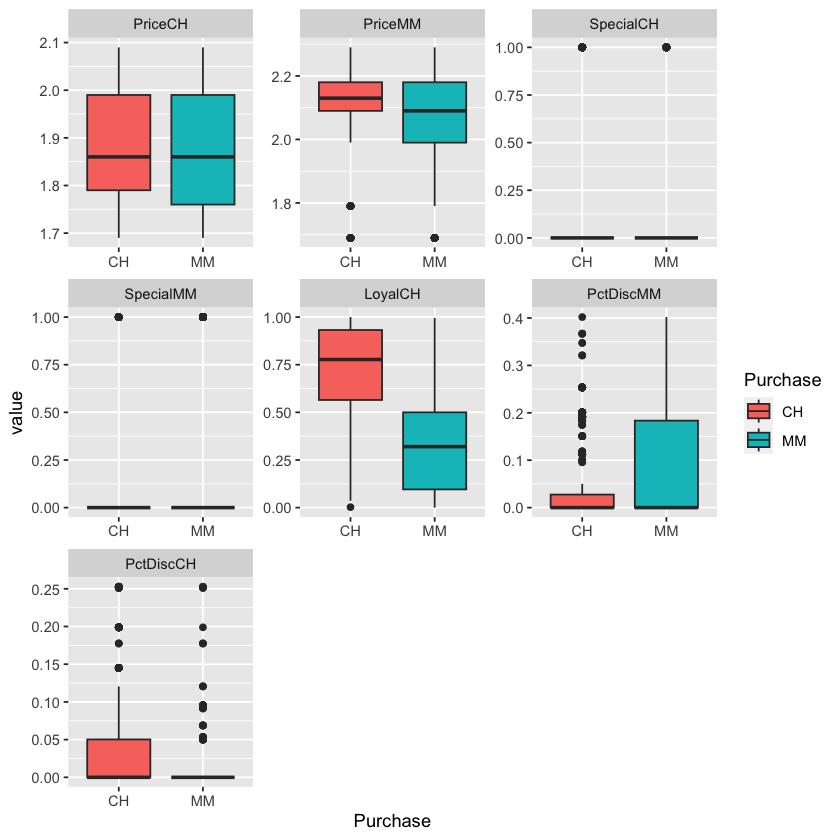

In [31]:
#creating dataframe and dropping heavily correlated variables
OJ_2 <- subset(OJ, select =-c(StoreID,STORE,Store7, WeekofPurchase, SalePriceMM,SalePriceCH,PriceDiff,DiscMM,DiscCH,ListPriceDiff))
OJ_2 %>%
    melt(id.var="Purchase") %>% #melt is function from reshape2 package
    ggplot(aes(x=Purchase, y=value, fill=Purchase)) + 
    geom_boxplot() +
    facet_wrap(~variable,ncol = 3, scales="free")


In [71]:
#model cross validation

control <- trainControl(method="cv", number=20)

set.seed(7)
#LR
fit.lr.full <- train(Purchase ~ PriceCH+PriceMM+PctDiscMM+PctDiscCH+LoyalCH+STORE, data=OJ, method="glm",family="binomial", trControl=control)
# LDA
fit.lda.full <- train(Purchase ~ PriceCH+PriceMM+PctDiscMM+PctDiscCH+LoyalCH+STORE, data=OJ, method="lda", trControl=control)
# QDA
fit.qda.full <- train(Purchase ~ PriceCH+PriceMM+PctDiscMM+PctDiscCH+LoyalCH+STORE, data=OJ, method="qda", trControl=control)
# kNN
fit.knn.full <- train(Purchase ~ PriceCH+PriceMM+PctDiscMM+PctDiscCH+LoyalCH+STORE, data=OJ, method="knn", trControl=control)

# collect resamples
results <- resamples(list(LR=fit.lr.full, LDA=fit.lda.full, KNN=fit.knn.full, QDA=fit.qda.full))

In [72]:
#displaying results of cross validation
summary(results)


Call:
summary.resamples(object = results)

Models: LR, LDA, KNN, QDA 
Number of resamples: 20 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.7222222 0.7953354 0.8333333 0.8280526 0.8552350 0.8867925    0
LDA 0.7222222 0.7857906 0.8148148 0.8227873 0.8679245 0.9056604    0
KNN 0.7169811 0.7777778 0.8130678 0.8084032 0.8309748 0.9056604    0
QDA 0.6792453 0.7887841 0.8225017 0.8149022 0.8372642 0.9056604    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.3891403 0.5767315 0.6399976 0.6338263 0.7009075 0.7672035    0
LDA 0.4206009 0.5490139 0.6035242 0.6241839 0.7132070 0.8044280    0
KNN 0.3917368 0.5288961 0.6004035 0.5934234 0.6433987 0.8044280    0
QDA 0.3370125 0.5590098 0.6348596 0.6160488 0.6621324 0.8044280    0


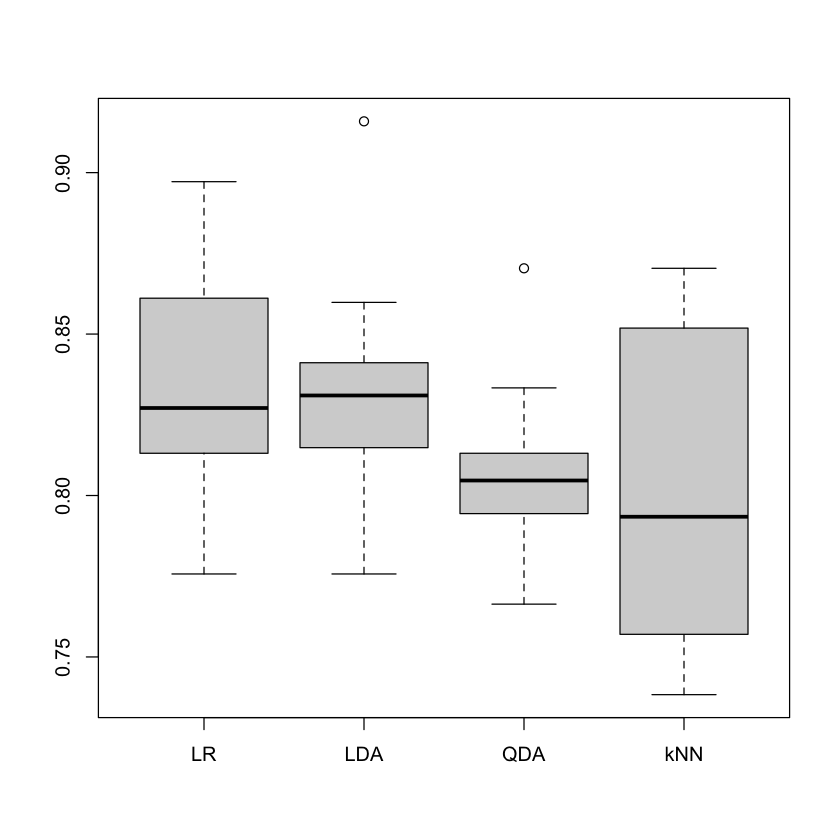

In [119]:
boxplot(results$values[,"LR~Accuracy"],results$values[,"LDA~Accuracy"], results$values[,"QDA~Accuracy"], results$values[,"KNN~Accuracy"], names=c("LR","LDA","QDA","kNN"))

In [82]:
#predictions using LR on test data
fit.ldr.4 <- glm(Purchase ~ PriceCH+PriceMM+PctDiscMM+PctDiscCH+LoyalCH+STORE, data = test,family = binomial(link = 'logit'))
summary(fit.ldr.4)


Call:
glm(formula = Purchase ~ PriceCH + PriceMM + PctDiscMM + PctDiscCH + 
    LoyalCH + STORE, family = binomial(link = "logit"), data = test)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9297  -0.5373  -0.1978   0.5002   2.9497  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.016871   3.196471   1.570 0.116531    
PriceCH      4.825309   2.406837   2.005 0.044981 *  
PriceMM     -5.124436   1.594819  -3.213 0.001313 ** 
PctDiscMM    6.228202   1.799525   3.461 0.000538 ***
PctDiscCH   -5.098652   2.930333  -1.740 0.081867 .  
LoyalCH     -7.275104   0.805080  -9.036  < 2e-16 ***
STORE       -0.002151   0.149006  -0.014 0.988483    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 438.09  on 320  degrees of freedom
Residual deviance: 242.51  on 314  degrees of freedom
AIC: 256.51

Number of Fisher Scoring iterations: 5
